## 1. Play with neural networks in the TensorFlow Playground for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?


## 2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)

In [1]:
import tensorflow as tf
import numpy as np

# set seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, input_shape=[6], activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu")
])

# Compile model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [2]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
Total params: 210 (840.00 Byte)
Trainable params: 210 (840.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [3]:
from sklearn.datasets import make_moons

# Make 1000 examples
n_samples = 1000

# Create moons
X, y = make_moons(n_samples,
                  noise=0.03,
                  random_state=42)

In [4]:
X, y

(array([[-0.00933187,  0.39098105],
        [ 0.95457387, -0.47375583],
        [ 0.9185256 , -0.42519648],
        ...,
        [ 1.65391483, -0.29179795],
        [-0.9341017 ,  0.35358221],
        [ 0.7968358 ,  0.60423662]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [5]:
# visualize the data
import pandas as pd
moons = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
moons

,X0,X1,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
...,...,...,...
995,0.793018,0.591402,0
996,-0.138777,0.968000,0
997,1.653915,-0.291798,1
998,-0.934102,0.353582,0


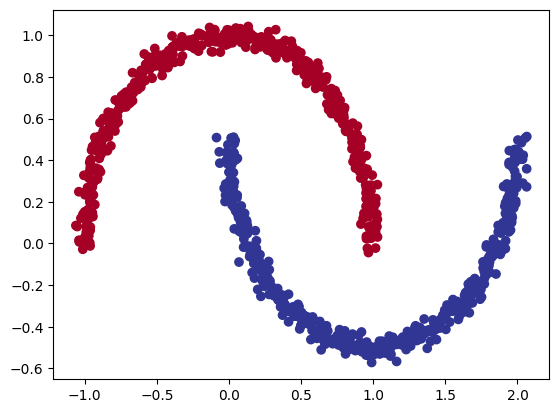

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [7]:
# Split into train and test
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [9]:
# Let's build our neural networl
tf.random.set_seed(42)


# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_model_2 = model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 5ms/step - loss: 7.1616 - accuracy: 0.2087
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 7.1380 - accuracy: 0.2163
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 7.1182 - accuracy: 0.2262
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 7.0998 - accuracy: 0.2325
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 7.0836 - accuracy: 0.2387
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 7.0690 - accuracy: 0.2537
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 7.0545 - accuracy: 0.2587
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 6.9591 - accuracy: 0.2688
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 6.7489 - accuracy: 0.2750
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 6.5683 - accuracy: 0.2738
Epoch 11/

In [11]:
# Accuracy only reaching 53.75%
# let's add sigmoid layer
tf.random.set_seed(42)

# create model 3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile model 3
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit model 3
history_model_3 = model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6282 - accuracy: 0.7200
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.7163
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.7025
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.7100
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.7175
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.7188
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5842 - accuracy: 0.7212
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.7250
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5713 - accuracy: 0.7287
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7325
Epoch 11/

In [12]:
# Evaluate the model
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.3055 - accuracy: 0.8850


[0.3055361211299896, 0.8849999904632568]

In [17]:
# Let's recreate plot boundaries function

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resource:
  - cs231n neural network case study
  - Made with ML
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make prediction on these)
  x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D array together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


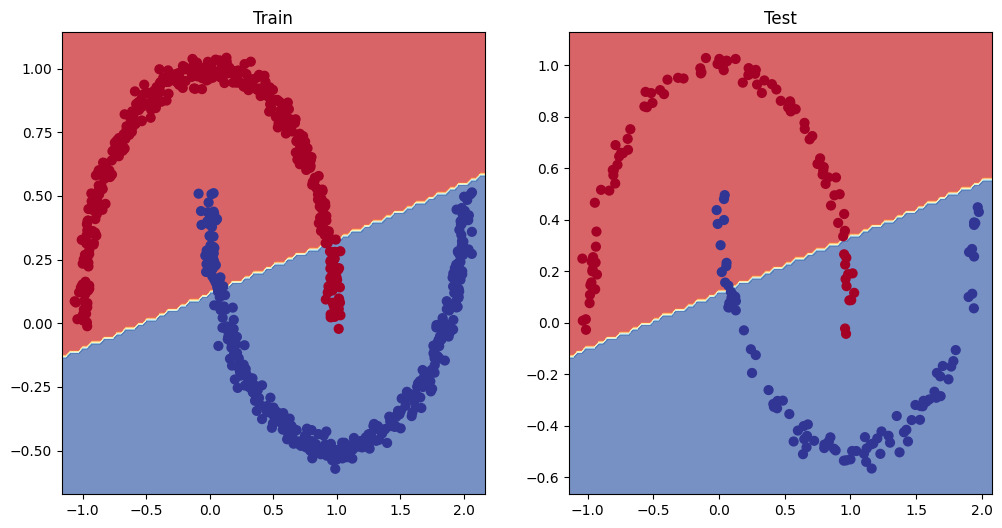

In [18]:
# Let's plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X=X_test, y=y_test)
plt.show()

In [19]:
# Let's try improving the model by adding more hidden units in the firs layer
tf.random.set_seed(42)

# Create model 4
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model 4
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model 4
history_model_4 = model_4.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.7248 - accuracy: 0.5038
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.6825
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.7550
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.7987
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.8163
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.8487
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.8675
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.8750
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8712
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.8712
Epoch 11/

In [20]:
# Evaluate the model 4
model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.2439 - accuracy: 0.8950


[0.24393783509731293, 0.8949999809265137]

313/313 [==============================] - 2s 4ms/step
doing binary classification
313/313 [==============================] - 1s 4ms/step
doing binary classification


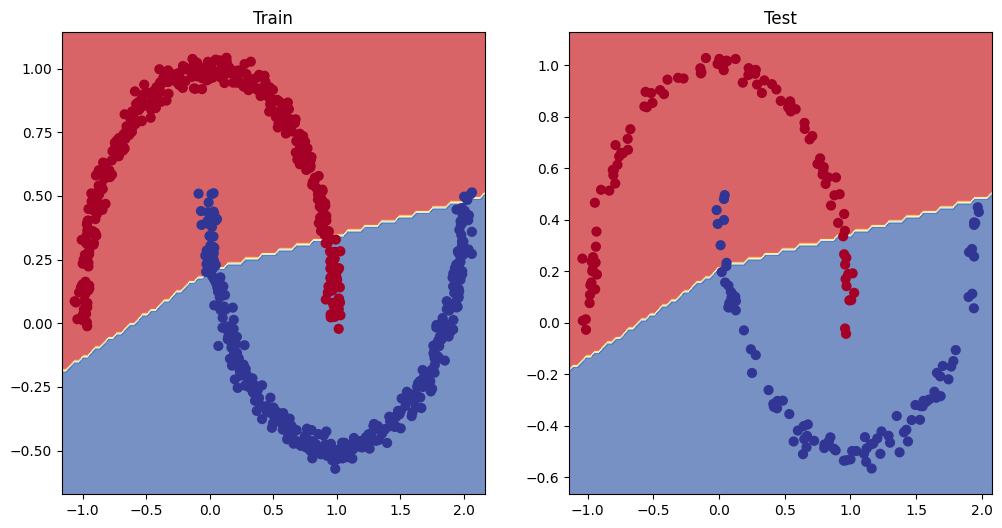

In [21]:
# Let's plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X=X_test, y=y_test)
plt.show()

In [22]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                30        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test set
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [24]:
# Show the first training example
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [27]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [52]:
# Let's build our first model
tf.random.set_seed(42)

# Create model 5
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])


# Compile model 5
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# fit model 5
history_model_5 = model_5.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 1.3589 - accuracy: 0.7451 - val_loss: 0.6466 - val_accuracy: 0.7844
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5518 - accuracy: 0.8107 - val_loss: 0.5855 - val_accuracy: 0.8063
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4762 - accuracy: 0.8323 - val_loss: 0.5680 - val_accuracy: 0.7946
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4387 - accuracy: 0.8437 - val_loss: 0.4851 - val_accuracy: 0.8401
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4183 - accuracy: 0.8487 - val_loss: 0.5047 - val_accuracy: 0.8218
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3903 - accuracy: 0.8571 - val_loss: 0.4562 - val_accuracy: 0.8377
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3800 - accuracy: 0.8613 - val_loss: 0.4305 - val_accuracy

In [53]:
y_probs = model_5.predict(test_data)
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.09968534e-10, 1.80415044e-10, 1.64823623e-11, 1.94226539e-13,
        3.04225541e-16, 2.40628025e-03, 2.49281130e-12, 8.88420269e-02,
        2.93896778e-06, 9.08748806e-01],
       [4.52820859e-05, 4.71741646e-10, 9.90565896e-01, 7.55102363e-08,
        7.16582173e-03, 1.86574960e-35, 2.22264719e-03, 0.00000000e+00,
        3.05987413e-07, 5.87399698e-37],
       [4.14068519e-13, 9.99999940e-01, 1.18100131e-15, 1.69041406e-10,
        6.06357195e-12, 8.13699087e-37, 1.53374175e-17, 0.00000000e+00,
        1.85007099e-09, 0.00000000e+00],
       [6.55901360e-15, 9.99999940e-01, 7.58143722e-16, 3.55542012e-10,
        3.85888776e-13, 0.00000000e+00, 6.77580346e-20, 0.00000000e+00,
        5.91929838e-10, 0.00000000e+00],
       [2.54288074e-02, 4.57647684e-06, 8.54053572e-02, 7.60765839e-03,
        9.14347321e-02, 2.47070177e-11, 7.78532922e-01, 5.17205445e-11,
        1.15859322e-02, 1.32051869e-10]], dtype=float32)

In [54]:
y_preds=y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [55]:
y_true = test_labels
y_pred = y_preds

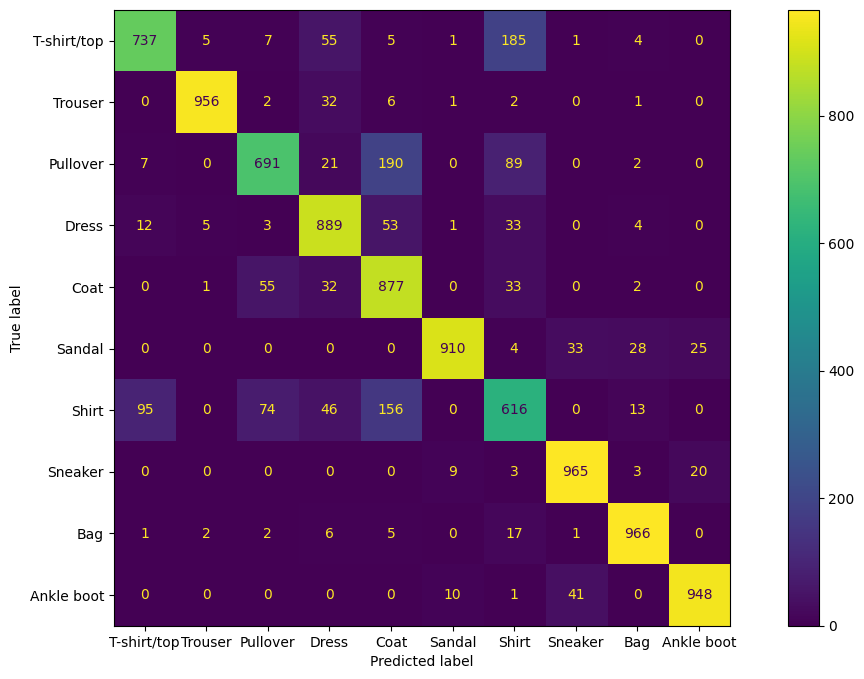

In [56]:
from sklearn import metrics

actual = y_true
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"])

# Set the width and height of the figure
fig, ax = plt.subplots(figsize=(15, 8))

cm_display.plot(ax=ax)
plt.show()

# 5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [58]:
# Create a tensor
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [63]:
# Let's start replication a softmax activation function - softmax = exp(x) / tf.reduce_sum(exp(x))

def softmax(x):
  return tf.exp(x) / tf.reduce_sum(tf.exp(x))

# use softmax function on tensor A
softmax(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([3.5416430e-09, 9.6271835e-09, 2.6169397e-08, 7.1135801e-08,
       1.9336716e-07, 5.2562643e-07, 1.4288007e-06, 3.8838834e-06,
       1.0557488e-05, 2.8698230e-05, 7.8009878e-05, 2.1205282e-04,
       5.7641935e-04, 1.5668703e-03, 4.2591947e-03, 1.1577693e-02,
       3.1471431e-02, 8.5548222e-02, 2.3254417e-01, 6.3212061e-01],
      dtype=float32)>